# Portfolio Predictions

In [8]:
# Installing Yahoo finance for most accurate historical data
#!pip install yfinance 


In [9]:
#import needed libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [10]:
#define function to pull 10 years of historical data based on Stock Symbol

def find_stock(stock):
    ticker = stock
    data = yf.download(ticker)
    return data



In [11]:
#Our first attempt will be with Apple
aapl = find_stock('AAPL')
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


In [12]:
#Create  a function to easily calculate moving averages of 10 and 50 days on closing price for given stock
def moving_average(stock):
    stock['MA10'] = stock['Close'].rolling(window=10).mean()
    stock['MA50'] = stock['Close'].rolling(window=50).mean()
    stock = stock.dropna() #drop null values for model
    return stock


In [13]:
aapl = moving_average(aapl)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
1981-02-24,0.107143,0.107143,0.106027,0.106027,0.081736,16979200,0.114676,0.132578
1981-02-25,0.112723,0.113281,0.112723,0.112723,0.086898,19488000,0.113783,0.132266
1981-02-26,0.114397,0.114955,0.114397,0.114397,0.088188,10841600,0.113448,0.132120
1981-02-27,0.118304,0.119420,0.118304,0.118304,0.091200,14761600,0.113616,0.132232
1981-03-02,0.118862,0.119420,0.118862,0.118862,0.091630,11760000,0.114118,0.132299


In [14]:
#Definig Features and targets for model
X = aapl[['Close','MA10','MA50']]
y = aapl['Close'].shift(-1).dropna()
X=X[:-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
#Start Making Predictions
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f'Mean Squared error: {mse}')
print(f'R square score: {r2}')


Mean Squared error: 0.7387575337681478
R square score: 0.9996533737963275


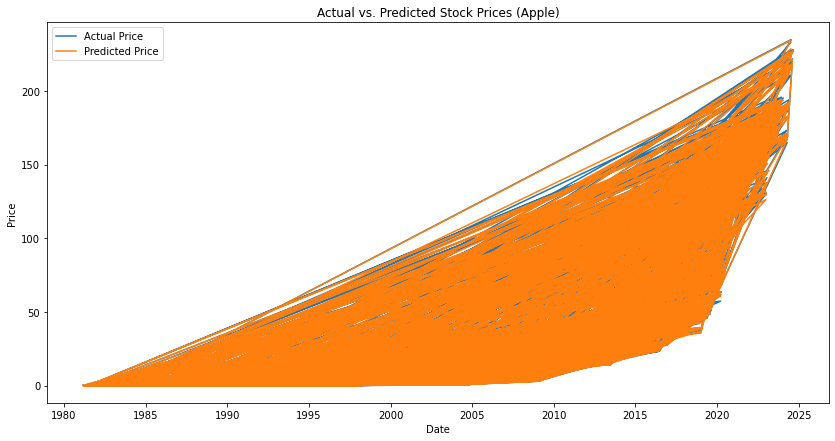

In [16]:

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (Apple)')
plt.legend()
plt.show()